# Supply Chain Management 

- Product Type - 제품 유형
- SKU - Stock keeping unit 재고 기본 단위
- Price - 가격
- Availability - 유용성
- Number of products sold - 판매 상품 수
- Revenue generated - 수익 발생
- Customer demographics - 고객 인구 통계
- Stock levels - 재고 수준
- Lead times - 리드 타임
- Order quantities - 주문 수량
- Shipping times - 출하 시기
- Shipping carriers - 운송 업자
- Shipping costs - 배송비
- Supplier name - 공급자명
- Location - 위치
- Lead time - 리드 타임
- Production volumes - 생산량
- Manufacturing lead time - 제조 리드 타임
- Manufacturing costs - 제조 원가
- Inspection results - 점검 결과
- Defect rates - 불량률
- Transportation modes - 운송 모드
- Routes - 경로
- Costs - 비용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('supply_chain_data.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [4]:
df.shape

(100, 24)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,100.0,49.462461,31.168193,1.699976,19.597823,51.239831,77.198228,99.171329
Availability,100.0,48.400000,30.743317,1.000000,22.750000,43.500000,75.000000,100.000000
Number of products sold,100.0,460.990000,303.780074,8.000000,184.250000,392.500000,704.250000,996.000000
Revenue generated,100.0,5776.048187,2732.841744,1061.618523,2812.847151,6006.352023,8253.976921,9866.465458
Stock levels,100.0,47.770000,31.369372,0.000000,16.750000,47.500000,73.000000,100.000000
Lead times,100.0,15.960000,8.785801,1.000000,8.000000,17.000000,24.000000,30.000000
Order quantities,100.0,49.220000,26.784429,1.000000,26.000000,52.000000,71.250000,96.000000
Shipping times,100.0,5.750000,2.724283,1.000000,3.750000,6.000000,8.000000,10.000000
Shipping costs,100.0,5.548149,2.651376,1.013487,3.540248,5.320534,7.601695,9.929816
Lead time,100.0,17.080000,8.846251,1.000000,10.000000,18.000000,25.000000,30.000000


Text(0.5, 1.0, 'Number of Products by Type')

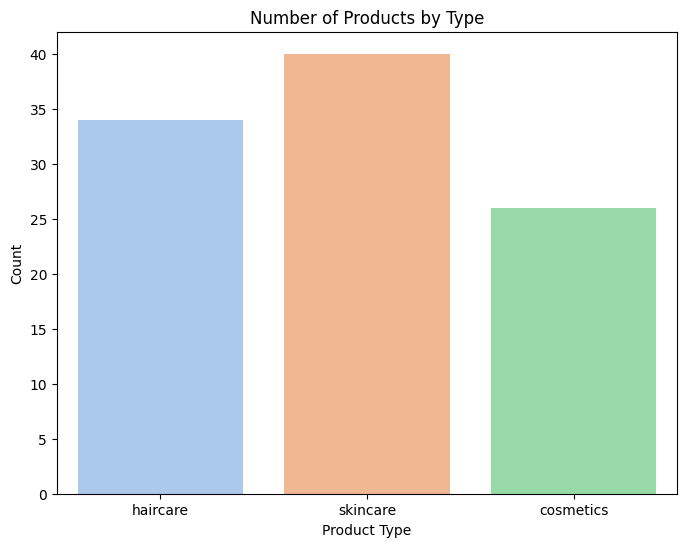

In [11]:
plt.figure(figsize = (8,6))
sns.set_palette('pastel')
sns.countplot(data = df, x = 'Product type')

plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Number of Products by Type')



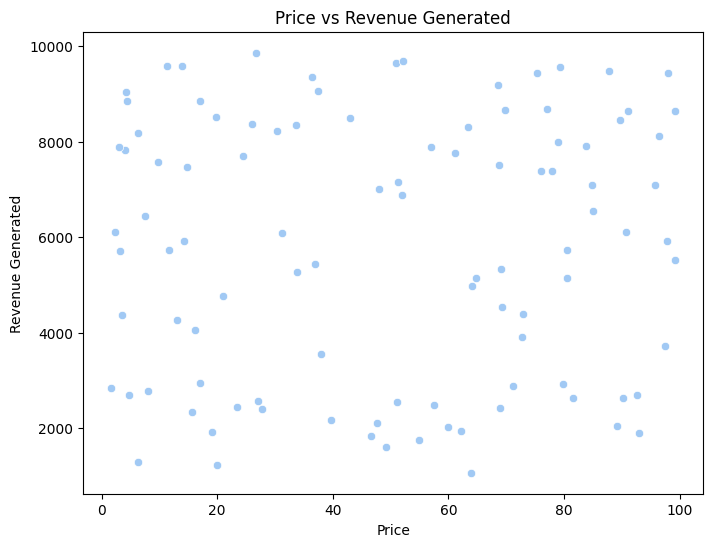

In [15]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x = 'Price', y = 'Revenue generated')

plt.xlabel('Price')
plt.ylabel('Revenue Generated')
plt.title('Price vs Revenue Generated')
plt.show()

- 가격에 따른 수익 발생: 가격과 상관없이 산발적으로 수익이 발생하는 것을 확인할 수 있음. 가격과 수익 발생 사이 관련성이 없음.

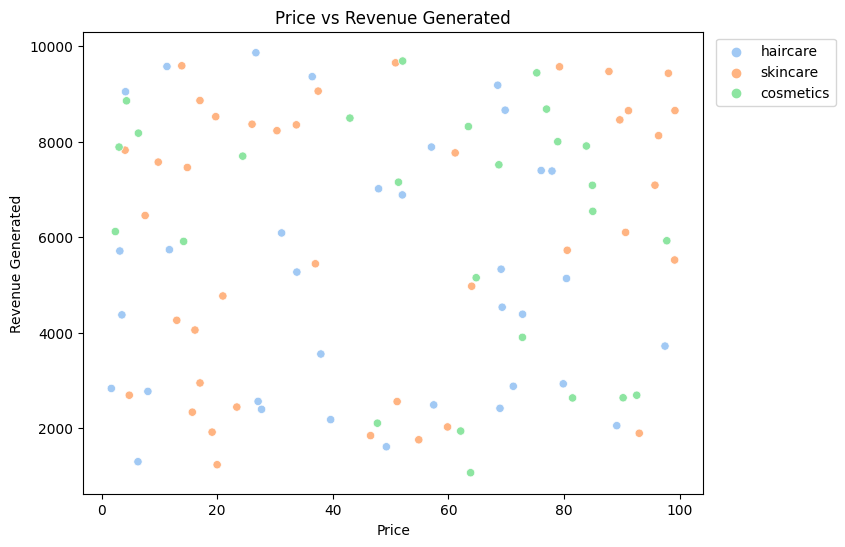

In [36]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='Price', y='Revenue generated', hue='Product type')
plt.xlabel('Price')
plt.ylabel('Revenue Generated')
plt.title('Price vs Revenue Generated')
plt.legend(bbox_to_anchor = (1.01, 1), loc = 'upper left')
plt.show()

- 같은 상품, 같은 가격이라도 이익 분포가 크게 난다

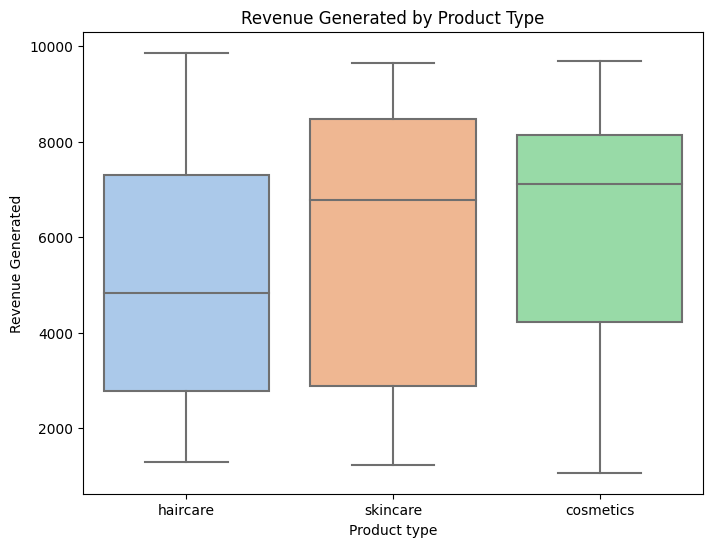

In [22]:
# 상품에 따른 이익 분포 확인

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Product type', y='Revenue generated')

plt.xlabel('Product type')
plt.ylabel('Revenue Generated')
plt.title('Revenue Generated by Product Type')

plt.show()

- 코스메틱의 경우, 판매 수량이 가장 적은 반면에 수익 발생의 중앙값이 가장 높음.

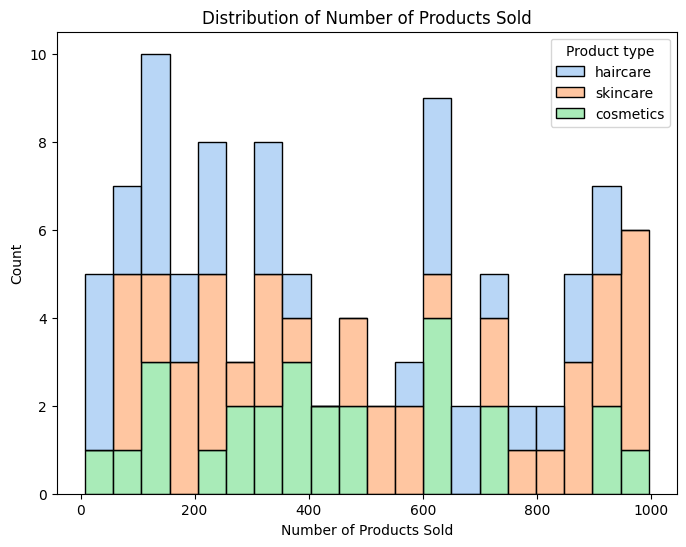

In [27]:
# product type과 판매량


plt.figure(figsize=(8,6))
sns.histplot(data = df, x = 'Number of products sold', bins = 20, hue = 'Product type', multiple = 'stack')
plt.xlabel('Number of Products Sold')
plt.ylabel('Count')
plt.title('Distribution of Number of Products Sold')

plt.show()

- 판매 수량이 0 ~ 200 사이 구간에서 헤어 제품이 상당 수 차지하고, 800 ~ 100 사이 구간에서는 스킨케어 제품이 상당 수 차지함.

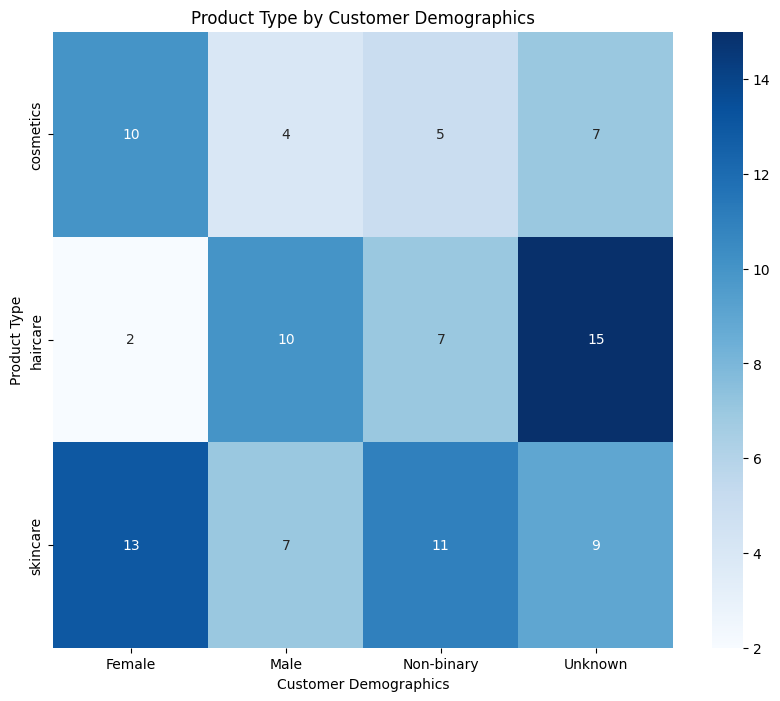

In [30]:
# 고객 분포와 product 타입

plt.figure(figsize=(10,8))

sns.heatmap(pd.crosstab(df['Product type'], df['Customer demographics']),
                 cmap='Blues', annot=True, fmt='d')

plt.xlabel('Customer Demographics')
plt.ylabel('Product Type')
plt.title('Product Type by Customer Demographics')

plt.show()

- male과 female의 선호 상품 타입 차이가 보임.

<Figure size 1200x1000 with 0 Axes>

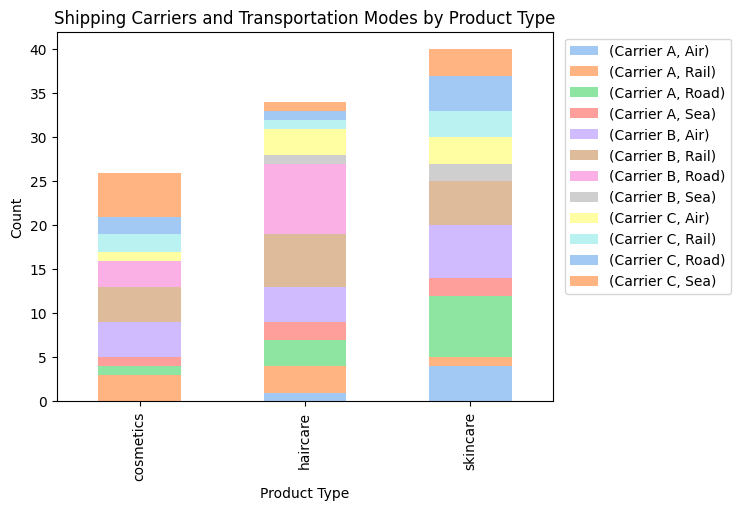

In [34]:
plt.figure(figsize=(12, 10))

# Create the stacked bar plot
pd.crosstab(df['Product type'], 
            [df['Shipping carriers'], df['Transportation modes']]).plot(kind = 'bar', stacked = True)

# Set the labels and title
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Shipping Carriers and Transportation Modes by Product Type')

plt.legend(bbox_to_anchor = (1.01, 1), loc = 'upper left')

plt.show()


- cosmetics는 다른 제품군에 비해서 Carrier C sea의 비율이 가장 높은 것으로 보인다.
- haircare의 경우, 다른 제품군에 비해서 Carrier B road의 비율이 가장 높다.
- skincare의 경우, 다른 제품군에 비해서 Carrier A air와 Carrier C road의 비율이 가장 높다. 

- Carrier B air와 Carrier B rail의 경우 모든 제품군에서 비슷한 정도로 사용하고 있는 운송업자-운송모드로 확인된다. 

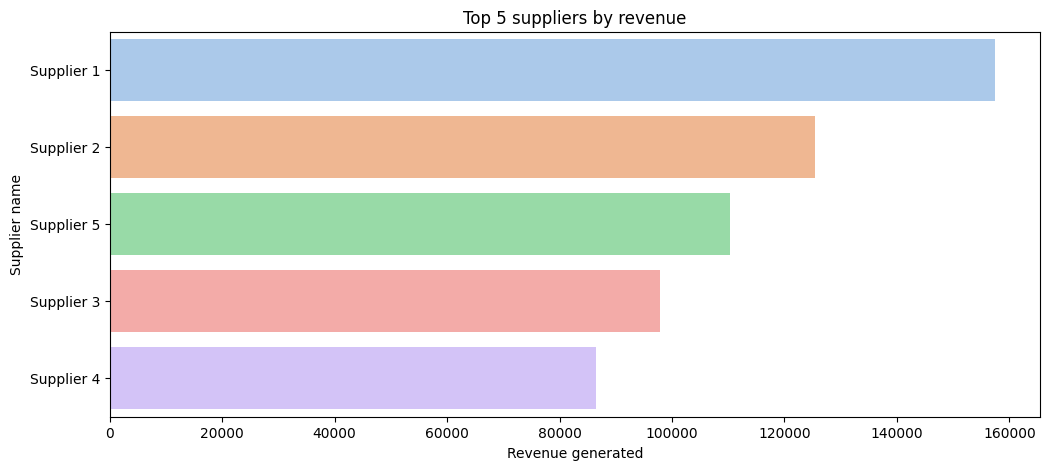

In [40]:
plt.figure(figsize=(12,5))

# `Supplier name`별로 `Revenue generated`의 합계를 구하고, nlargest로 합계가 가장 큰 상위 5개 공급 업체 선정
top_suppliers = df.groupby('Supplier name')['Revenue generated'].sum().nlargest(5)

sns.barplot(x = top_suppliers.values, y = top_suppliers.index)


plt.xlabel('Revenue generated')
plt.ylabel('Supplier name')
plt.title('Top 5 suppliers by revenue')
plt.show()

- 공급업체에 따른 이익 비용을 그래프로 그려보았을 때, 공급자 1의 경우 이익 비용이 가장 크고 공급자 4의 경우 이익 비용이 가장 낮음. 공급자 1을 사용하여 공급했을 때 이익이 높을 수 있음.

/var/folders/lp/064sgjgn4kn9lkmy_3z3mj3c0000gn/T/ipykernel_32247/2520804750.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


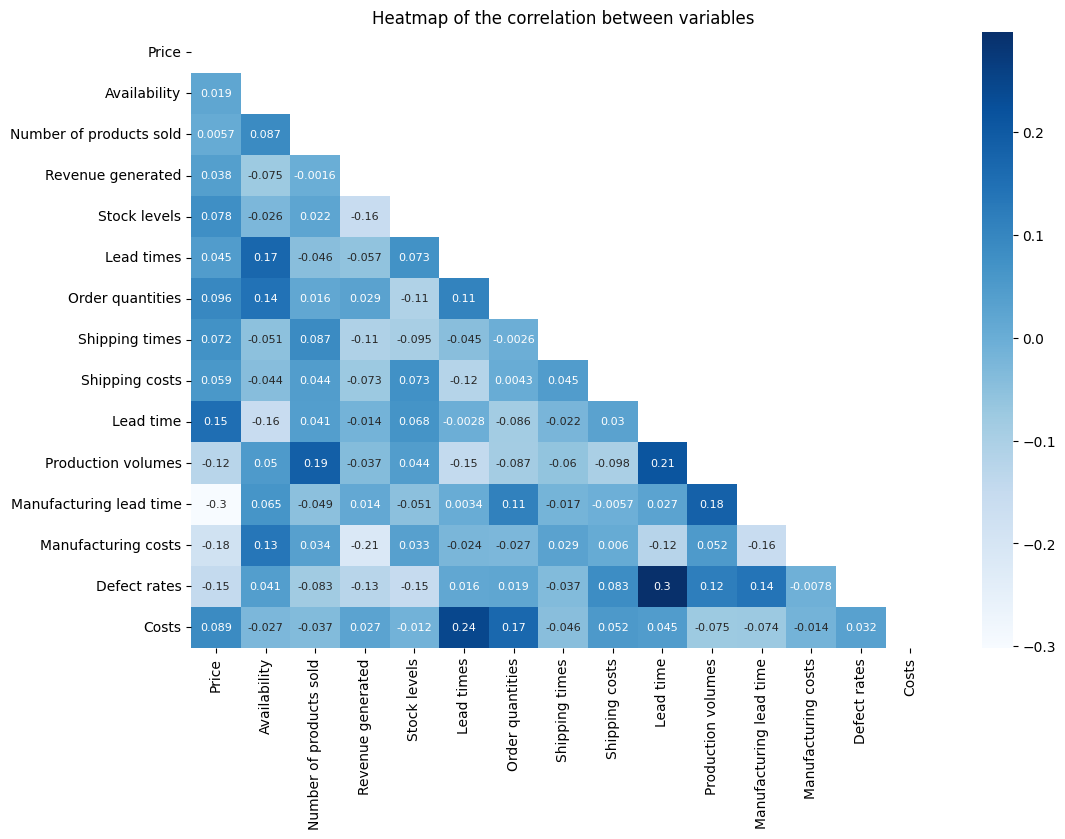

In [47]:
plt.figure(figsize=(12,8))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, cmap = 'Blues', mask = mask
           , annot_kws = {'size' : 8}) #, fmt = ".2f")

plt.title('Heatmap of the correlation between variables')

plt.show()

- price와 제조 리드 타임과 관계성
- 이익 창출과 manufacturing cost 음의 상관성 (약함)

→ 전반적으로 복합적인 영향이 미치는 것으로 보임

## <center> [ 결 론 ] <center>

- skin care 종류가 가장 많이 팔렸으나 이익 분포가 크다
- cosmetic 종류가 중앙값이 가장 크고, 분포가 작다
- 1번 공급자에게 받는 물건이 가장 이익이 크다
- 이익 창출은 복합적인 요소들의 영향을 받는다 (상관성이 뚜렷한 것이 없다)
- 제조 리드 타임은 상품 가격에 영향을 준다